# Homework3

> Note all tests use the `5%` significance level for type-I error and use `10`
lags in all ACF or ARCH-effect tests.

##  1. SBUX return
The file d-sbuxsp0106.txt contains the daily simple returns of Starbucks stock (SBUX) and the S&P 500 composite index from 1996 to 2006. The file consists of date, SBUX return, and S&P returns in three
columns. The returns include dividends. Convert the simple returns into
percentage log returns.

In [1]:
# read csv data
sbux_simple_return = read.csv("data/d-sbuxsp0106.csv")[,2]

In [2]:
# convert simple return into percentage log return
sbux_data = 100*log(1+sbux_simple_return)

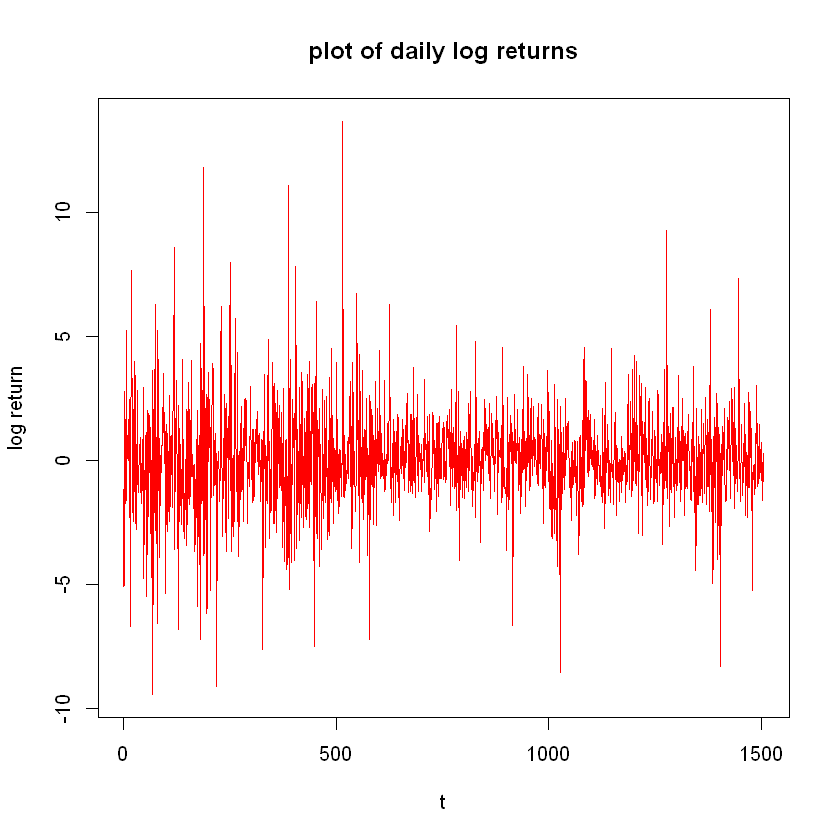

In [3]:
plot(sbux_data,xlab="t",ylab="log return",main="plot of daily log returns",type="l",col="red")

### a. Is there any serial correlation in the log returns of Starbucks stock?

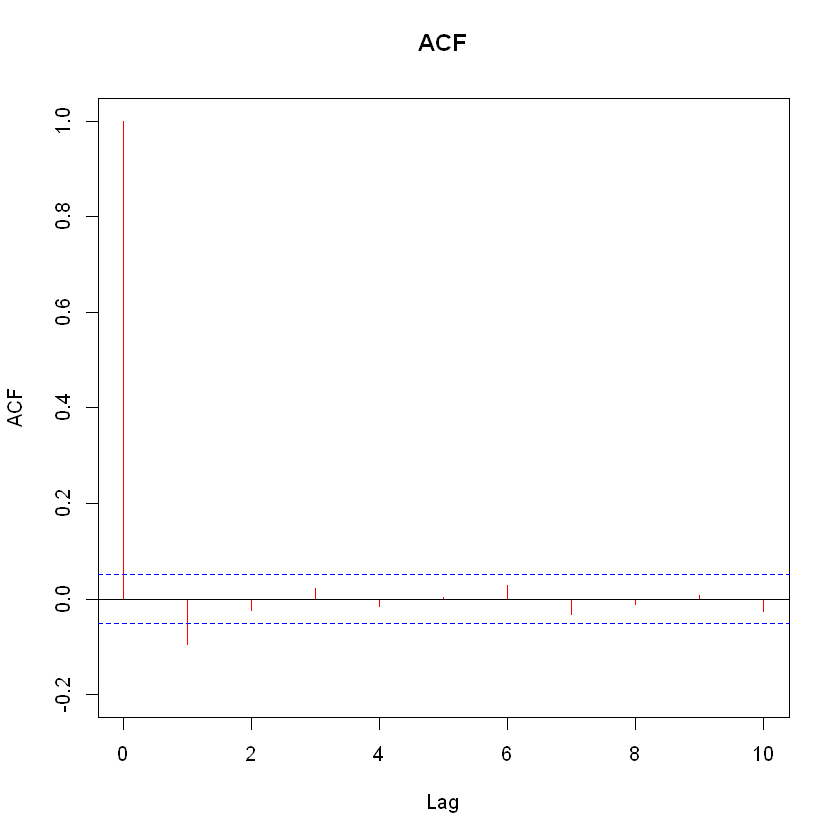

In [4]:
acf(sbux_data,10,main="ACF",col="red",ylim=c(-0.2,1))

In [5]:
Box.test(sbux_data,lag=10,type="Ljung")


	Box-Ljung test

data:  sbux_data
X-squared = 19.823, df = 10, p-value = 0.03098


Using the $\alpha=0.05$ significance level, the $p=0.03 < \alpha$, then reject the null hypothesis. 

Thus, claim that there is serial correlation in the log return of SBUX data.

### b. Is there any ARCH effect in the log returns of Starbucks stock?

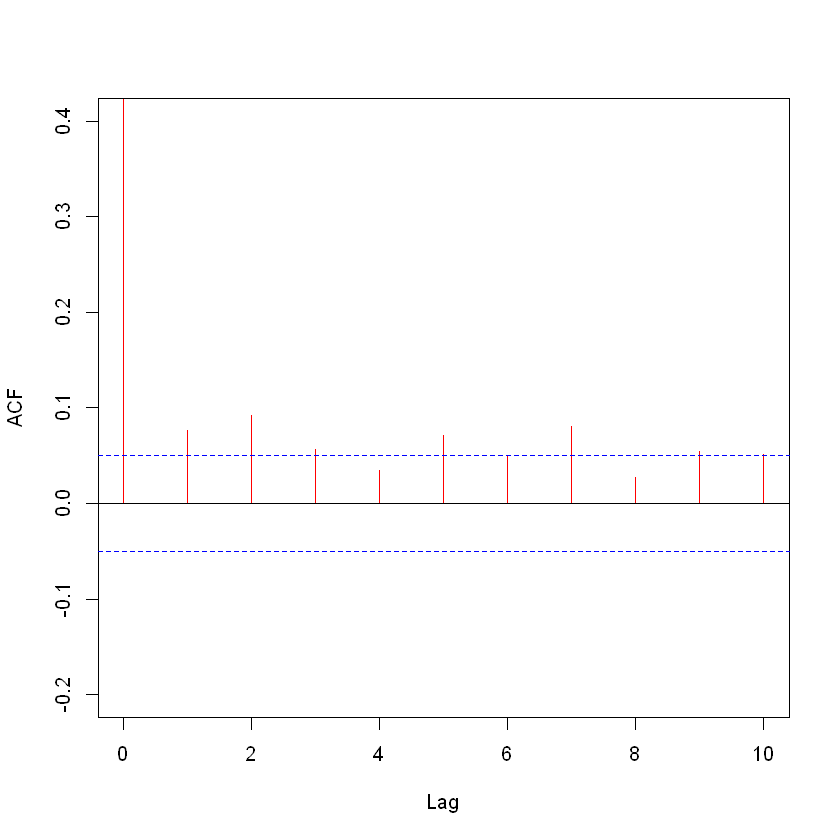

In [6]:
sbux_at=sbux_data-mean(sbux_data)
acf(sbux_at^2,10,main="",col="red",ylim=c(-0.2,0.4))

In [7]:
Box.test(sbux_at^2,lag=10,type="Ljung")


	Box-Ljung test

data:  sbux_at^2
X-squared = 59.142, df = 10, p-value = 5.265e-09


Using the $\alpha=0.05$ significance level, the $p=5.27e-9 << \alpha$, then reject the null hypothesis. 

Thus, claim that there is ARCH correlation in the log return of SBUX data.

### c. Fit a GARCH(1,1) model for the percentage log return of Starbucks stock using normal distribution for the innovations. 
Perform model checking and write down the fitted model.

In [8]:
library(fGarch);

Warning message:
"程辑包'fGarch'是用R版本4.2.3 来建造的"
NOTE: Packages 'fBasics', 'timeDate', and 'timeSeries' are no longer
attached to the search() path when 'fGarch' is attached.

If needed attach them yourself in your R script by e.g.,
        require("timeSeries")



In [9]:
sbux_garch = garchFit(~garch(1,1),data=sbux_at,trace = F,include.mean = F)
summary(sbux_garch)


Title:
 GARCH Modelling 

Call:
 garchFit(formula = ~garch(1, 1), data = sbux_at, include.mean = F, 
    trace = F) 

Mean and Variance Equation:
 data ~ garch(1, 1)
<environment: 0x000001f4b02ec680>
 [data = sbux_at]

Conditional Distribution:
 norm 

Coefficient(s):
   omega    alpha1     beta1  
0.015660  0.019164  0.976655  

Std. Errors:
 based on Hessian 

Error Analysis:
        Estimate  Std. Error  t value Pr(>|t|)    
omega   0.015660    0.006521    2.401   0.0163 *  
alpha1  0.019164    0.003855    4.971 6.66e-07 ***
beta1   0.976655    0.004326  225.777  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Log Likelihood:
 -3156.141    normalized:  -2.094321 

Description:
 Wed Apr 19 19:01:12 2023 by user: CreatorFan 


Standardised Residuals Tests:
                                Statistic p-Value  
 Jarque-Bera Test   R    Chi^2  1000.203  0        
 Shapiro-Wilk Test  R    W      0.9593982 0        
 Ljung-Box Test     R    Q(10)  11.17971  0

The model($garch(1,1)$) formula:
$$
\begin{aligned}
r_t &= \mu + a_t\\
a_t &= \sigma_t \epsilon_t\\
\sigma_t^2&=\omega+\alpha_1 a_{t-1}^2+\beta_1\sigma_{t-1}^2
\end{aligned}
$$

In [10]:
?read.csv

read.table {utils},R Documentation
file,"the name of the file which the data are to be read from. Each row of the table appears as one line of the file. If it does not contain an absolute path, the file name is relative to the current working directory, getwd(). Tilde-expansion is performed where supported. This can be a compressed file (see file). Alternatively, file can be a readable text-mode connection (which will be opened for reading if necessary, and if so closed (and hence destroyed) at the end of the function call). (If stdin() is used, the prompts for lines may be somewhat confusing. Terminate input with a blank line or an EOF signal, Ctrl-D on Unix and Ctrl-Z on Windows. Any pushback on stdin() will be cleared before return.) file can also be a complete URL. (For the supported URL schemes, see the ‘URLs’ section of the help for url.)"
header,"a logical value indicating whether the file contains the names of the variables as its first line. If missing, the value is determined from the file format: header is set to TRUE if and only if the first row contains one fewer field than the number of columns."
sep,"the field separator character. Values on each line of the file are separated by this character. If sep = """" (the default for read.table) the separator is ‘white space’, that is one or more spaces, tabs, newlines or carriage returns."
quote,"the set of quoting characters. To disable quoting altogether, use quote = """". See scan for the behaviour on quotes embedded in quotes. Quoting is only considered for columns read as character, which is all of them unless colClasses is specified."
dec,the character used in the file for decimal points.
numerals,"string indicating how to convert numbers whose conversion to double precision would lose accuracy, see type.convert. Can be abbreviated. (Applies also to complex-number inputs.)"
row.names,"a vector of row names. This can be a vector giving the actual row names, or a single number giving the column of the table which contains the row names, or character string giving the name of the table column containing the row names. If there is a header and the first row contains one fewer field than the number of columns, the first column in the input is used for the row names. Otherwise if row.names is missing, the rows are numbered. Using row.names = NULL forces row numbering. Missing or NULL row.names generate row names that are considered to be ‘automatic’ (and not preserved by as.matrix)."
col.names,"a vector of optional names for the variables. The default is to use ""V"" followed by the column number."
as.is,"controls conversion of character variables (insofar as they are not converted to logical, numeric or complex) to factors, if not otherwise specified by colClasses. Its value is either a vector of logicals (values are recycled if necessary), or a vector of numeric or character indices which specify which columns should not be converted to factors. Note: to suppress all conversions including those of numeric columns, set colClasses = ""character"". Note that as.is is specified per column (not per variable) and so includes the column of row names (if any) and any columns to be skipped."
na.strings,"a character vector of strings which are to be interpreted as NA values. Blank fields are also considered to be missing values in logical, integer, numeric and complex fields. Note that the test happens after white space is stripped from the input, so na.strings values may need their own white space stripped in advance."


In [11]:
stresi=residuals(sbux_garch,standardize=T)
Box.test(stresi,lag=10,type="Ljung")


	Box-Ljung test

data:  stresi
X-squared = 11.18, df = 10, p-value = 0.3437


Using the $\alpha=0.05$ significance level, the $p=0.34 > \alpha$, then not reject the null hypothesis that the standardized residuals $\epsilon_t$ are uncorrelated. 

Thus, the model satisfies the assumption the standardized residuals $\epsilon_t$ are uncorrelated and obeys a normal distribution. And we claim that the model pass the model checking.

## 2. Consider the daily percentage log returns of S&P 500 index in Problem 1.

In [12]:
sp500_simple_return = read.csv("data/d-sbuxsp0106.csv")[,3]

In [13]:
# convert the simple return to percentage log return 
sp500_data = log(1+sp500_simple_return)*100

#### a. Is there any serial correlation in the log returns of S&P index?

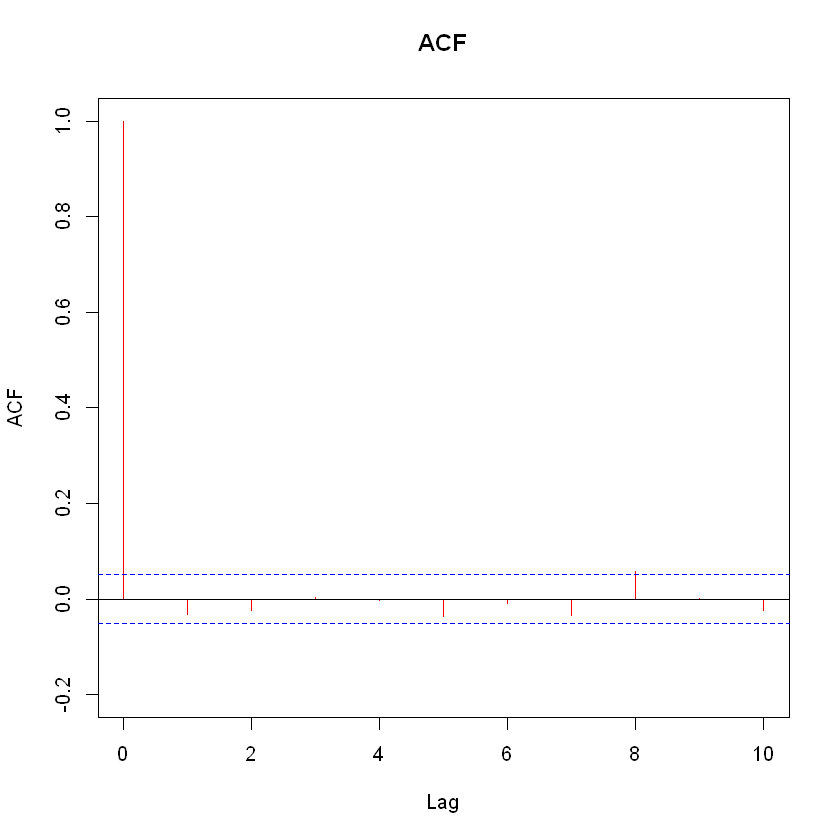

In [14]:
acf(sp500_data,10,main="ACF",col="red",ylim=c(-0.2,1))

In [15]:
Box.test(sp500_data,lag=10,type="Ljung")


	Box-Ljung test

data:  sp500_data
X-squared = 12.253, df = 10, p-value = 0.2685


Using the $\alpha=0.05$ significance level, the $p=0.27 > \alpha$, then not reject the null hypothesis. 

Thus, claim that there aren't any serial correlation in the percentage log return of S&P500 index data.

#### b. Is there any ARCH effect in the log return series of S&P index?

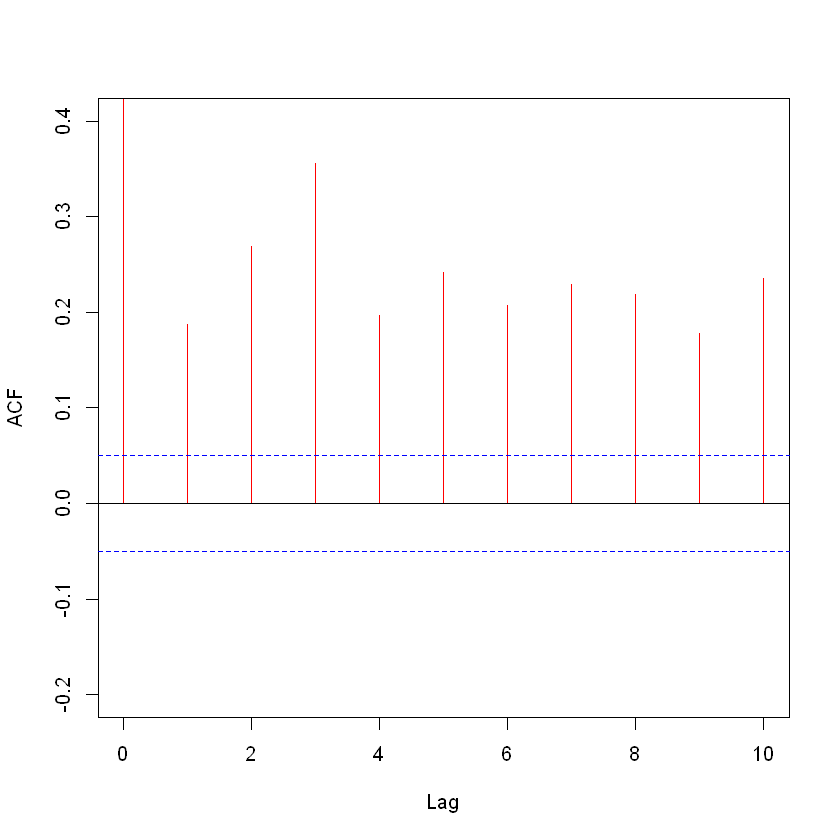

In [16]:
sp500_at=sp500_data-mean(sp500_data)
acf(sp500_at^2,10,main="",col="red",ylim=c(-0.2,0.4))

In [17]:
Box.test(sp500_at^2,lag=10,type="Ljung")


	Box-Ljung test

data:  sp500_at^2
X-squared = 850.73, df = 10, p-value < 2.2e-16


Using the $\alpha=0.05$ significance level, the $p < 2.2e-16 << \alpha$, then reject the null hypothesis. 

Thus, claim that there is ARCH correlation in the percentage log return of S&P 500 index data.

#### c. Fit an IGARCH(1,1) model for the log return series of the index 
using normal distribution for the innovations.

In [18]:
library("rugarch");

Warning message:
"程辑包'rugarch'是用R版本4.2.3 来建造的"
载入需要的程辑包：parallel


载入程辑包：'rugarch'


The following object is masked from 'package:stats':

    sigma




In [19]:
sp500_spec=ugarchspec(variance.model=list(model="iGARCH", garchOrder=c(1,1)),
                 mean.model=list(armaOrder=c(0,0)) )
sp500_igarch=ugarchfit(spec=sp500_spec,data=sp500_data)
sp500_igarch


*---------------------------------*
*          GARCH Model Fit        *
*---------------------------------*

Conditional Variance Dynamics 	
-----------------------------------
GARCH Model	: iGARCH(1,1)
Mean Model	: ARFIMA(0,0,0)
Distribution	: norm 

Optimal Parameters
------------------------------------
        Estimate  Std. Error  t value Pr(>|t|)
mu      0.039700    0.020102   1.9749 0.048283
omega   0.003201    0.001920   1.6671 0.095485
alpha1  0.067541    0.013261   5.0933 0.000000
beta1   0.932459          NA       NA       NA

Robust Standard Errors:
        Estimate  Std. Error  t value Pr(>|t|)
mu      0.039700    0.020512   1.9354 0.052938
omega   0.003201    0.002431   1.3168 0.187911
alpha1  0.067541    0.017749   3.8053 0.000142
beta1   0.932459          NA       NA       NA

LogLikelihood : -2007.41 

Information Criteria
------------------------------------
                   
Akaike       2.6681
Bayes        2.6787
Shibata      2.6681
Hannan-Quinn 2.6720

Weighted 

#### d. Compute 1 to 4-step ahead forecasts for the daily percentage log return and its 1-step forecasting interval.

In [20]:
sp500_forecast = ugarchforecast(sp500_igarch,n.ahead=4)
sp500_forecast

Warning message in `setfixed<-`(`*tmp*`, value = as.list(pars)):
"Unrecognized Parameter in Fixed Values: beta1...Ignored"



*------------------------------------*
*       GARCH Model Forecast         *
*------------------------------------*
Model: iGARCH
Horizon: 4
Roll Steps: 0
Out of Sample: 0

0-roll forecast [T0=1974-02-16 08:00:00]:
    Series  Sigma
T+1 0.0397 0.5003
T+2 0.0397 0.5035
T+3 0.0397 0.5066
T+4 0.0397 0.5098



## 3. Again, consider the daily percentage log returns of Starbucks stock
in Problem 1.
### a. Fit a GARCH(1,1)-M model for the series with normal distribution.
Write down the fitted model.

In [21]:
sbux_garch11m_spec = ugarchspec(variance.model = list(model="sGARCH", garchOrder=c(1, 1)),
                            mean.model=list(armaOrder=c(0, 0), include.mean=T, archm=T,archpow=2),
                            distribution.model="norm")
sbux_garch11m = ugarchfit(spec=sbux_garch11m_spec,data=sbux_data)
sbux_garch11m


*---------------------------------*
*          GARCH Model Fit        *
*---------------------------------*

Conditional Variance Dynamics 	
-----------------------------------
GARCH Model	: sGARCH(1,1)
Mean Model	: ARFIMA(0,0,0)
Distribution	: norm 

Optimal Parameters
------------------------------------
        Estimate  Std. Error   t value Pr(>|t|)
mu      0.200560    0.112708   1.77946 0.075164
archm  -0.022277    0.029817  -0.74712 0.454990
omega   0.016130    0.005970   2.70175 0.006898
alpha1  0.019818    0.001982   9.99963 0.000000
beta1   0.975892    0.001020 956.57538 0.000000

Robust Standard Errors:
        Estimate  Std. Error   t value Pr(>|t|)
mu      0.200560    0.113843   1.76172 0.078117
archm  -0.022277    0.030976  -0.71917 0.472039
omega   0.016130    0.010918   1.47740 0.139567
alpha1  0.019818    0.003121   6.34923 0.000000
beta1   0.975892    0.002123 459.69840 0.000000

LogLikelihood : -3155.382 

Information Criteria
------------------------------------
   

### b. Is the ARCH-in-mean parameter significant at the 5% level?

The p-value for the archm parameter is about $0.46 > \alpha=0.05$, then it isn't significant.  

### c. Fit a EGARCH(1,1) model with normal innovations to the log returnseries. 

Perform model checking and write down the fitted model.

In [22]:
sbux_egarch11_spec = ugarchspec(variance.model = list(model="eGARCH", garchOrder=c(1, 1)),
                            mean.model=list(armaOrder=c(0, 0), include.mean=T),
                            distribution.model="norm")
sbux_egarch11 = ugarchfit(spec=sbux_egarch11_spec,data=sbux_data)
sbux_egarch11


*---------------------------------*
*          GARCH Model Fit        *
*---------------------------------*

Conditional Variance Dynamics 	
-----------------------------------
GARCH Model	: eGARCH(1,1)
Mean Model	: ARFIMA(0,0,0)
Distribution	: norm 

Optimal Parameters
------------------------------------
        Estimate  Std. Error     t value Pr(>|t|)
mu      0.091661    0.048768      1.8795 0.060174
omega   0.010878    0.001545      7.0392 0.000000
alpha1 -0.039484    0.008608     -4.5871 0.000004
beta1   0.993389    0.000003 356469.8386 0.000000
gamma1  0.047904    0.002278     21.0290 0.000000

Robust Standard Errors:
        Estimate  Std. Error     t value Pr(>|t|)
mu      0.091661    0.056996      1.6082 0.107790
omega   0.010878    0.001994      5.4559 0.000000
alpha1 -0.039484    0.013822     -2.8565 0.004283
beta1   0.993389    0.000005 212175.9476 0.000000
gamma1  0.047904    0.003083     15.5373 0.000000

LogLikelihood : -3136.98 

Information Criteria
-----------------

### d. Is the leverage parameter significant?

The p-value of the leverage parameter $\gamma_1$ is less than $10^{-6} << \alpha=0.05$, then we can claim that the leverage parameter is significant. 

## 4. The data file m-pg5606.txt contains the date and monthly simple
returns of Procter & Gamble (PG) stock from 1956 to 2006. Transform
the simple returns into **percentage log returns**.

In [23]:
pg_simple_return = read.csv("data/m-pg5606.csv")[,2]

pg_data = 100*log(1+pg_simple_return)

### a. Is there any serial correlation in the monthly log returns of PG stock?

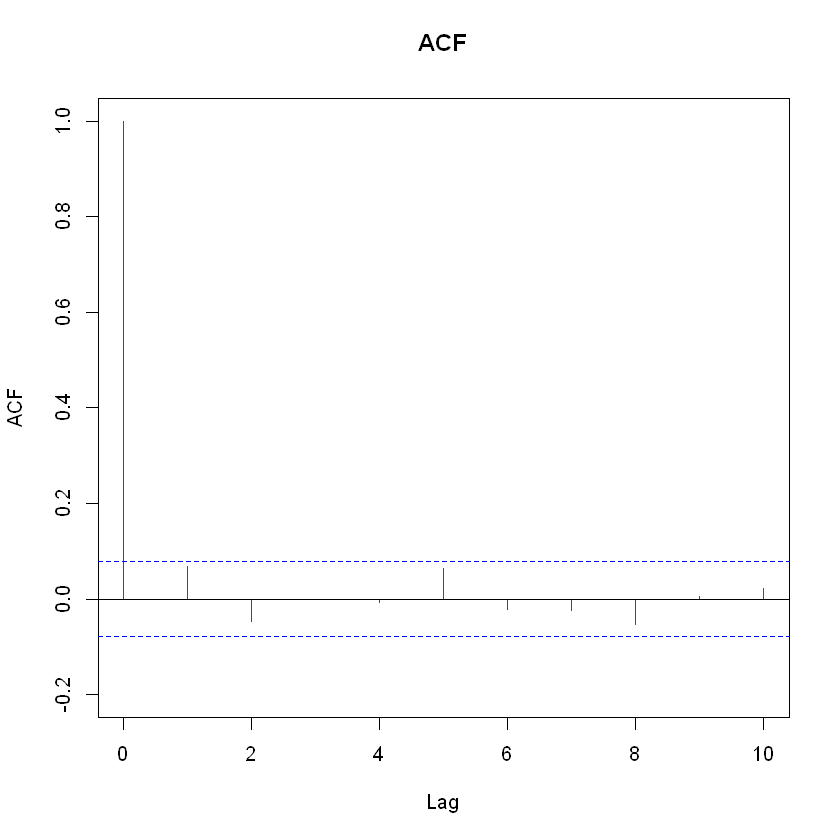

In [24]:
acf(pg_data,10,main="ACF",col="red",ylim=c(-0.2,1))

In [25]:
Box.test(pg_data,lag=10,type="Ljung")


	Box-Ljung test

data:  pg_data
X-squared = 9.65, df = 10, p-value = 0.4717


Using the $\alpha=0.05$ significance level, the $p=0.47 > \alpha=0.05$, then not reject the null hypothesis. 

Thus, claim that there isn't any serial correlation in the percentage log return of PG data.

### b. Fit a GARCH(1,1) model to the monthly percentage log returns of
PG stock using normal distribution for the innovations. Write down the
fitted model.

In [26]:
pg_garch = garchFit(~garch(1,1),data=pg_data,trace = F)
summary(pg_garch)


Title:
 GARCH Modelling 

Call:
 garchFit(formula = ~garch(1, 1), data = pg_data, trace = F) 

Mean and Variance Equation:
 data ~ garch(1, 1)
<environment: 0x000001f4b59436c0>
 [data = pg_data]

Conditional Distribution:
 norm 

Coefficient(s):
      mu     omega    alpha1     beta1  
0.856225  0.853618  0.096304  0.862410  

Std. Errors:
 based on Hessian 

Error Analysis:
        Estimate  Std. Error  t value Pr(>|t|)    
mu       0.85622     0.15801    5.419    6e-08 ***
omega    0.85362     0.39203    2.177 0.029449 *  
alpha1   0.09630     0.02697    3.571 0.000355 ***
beta1    0.86241     0.03133   27.528  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Log Likelihood:
 -1743.948    normalized:  -2.849587 

Description:
 Wed Apr 19 19:01:16 2023 by user: CreatorFan 


Standardised Residuals Tests:
                                Statistic p-Value     
 Jarque-Bera Test   R    Chi^2  312.8953  0           
 Shapiro-Wilk Test  R    W      0.9616424

### c. Use the fitted model to calculate 1-step to 5-step ahead forecasts for
the log returns series and its 1-step forecasting interval

meanForecast,meanError,standardDeviation,lowerInterval,upperInterval
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0.8562246,2.952357,2.952357,-4.930289,6.642738
0.8562246,3.034825,3.034825,-5.091923,6.804372
0.8562246,3.111837,3.111837,-5.242863,6.955312
0.8562246,3.183920,3.183920,-5.384145,7.096594
0.8562246,3.251528,3.251528,-5.516653,7.229102


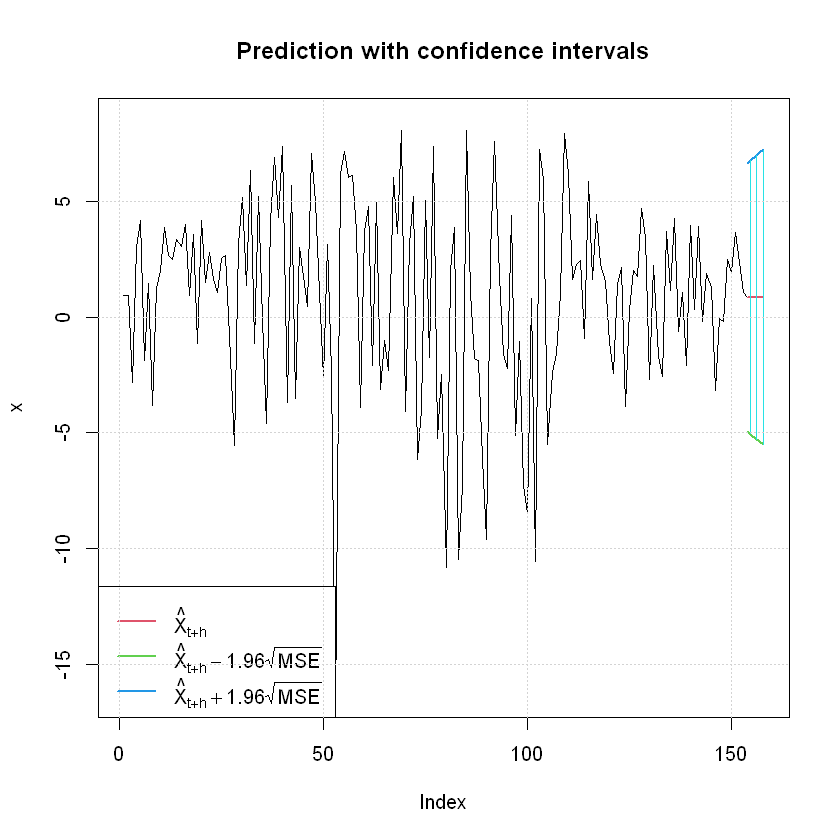

In [27]:
predict(pg_garch, n.ahead = 5, trace = F, mse = c("cond","uncond"), plot=T)

## 5. The file d-exuseu.txt contains the daily exchange rate between U.S.
Dollars and Euro from January 1999 to March 20, 2007. Compute the
**percentage log returns** of the exchange rate.

In [28]:
exchange_rate = read.csv("data/d-exuseu.csv")[,2]

# convert price to percentage log return 

exchange_data = 100*diff(log(exchange_rate))

### a. Is there any serial correlation in the log return series?

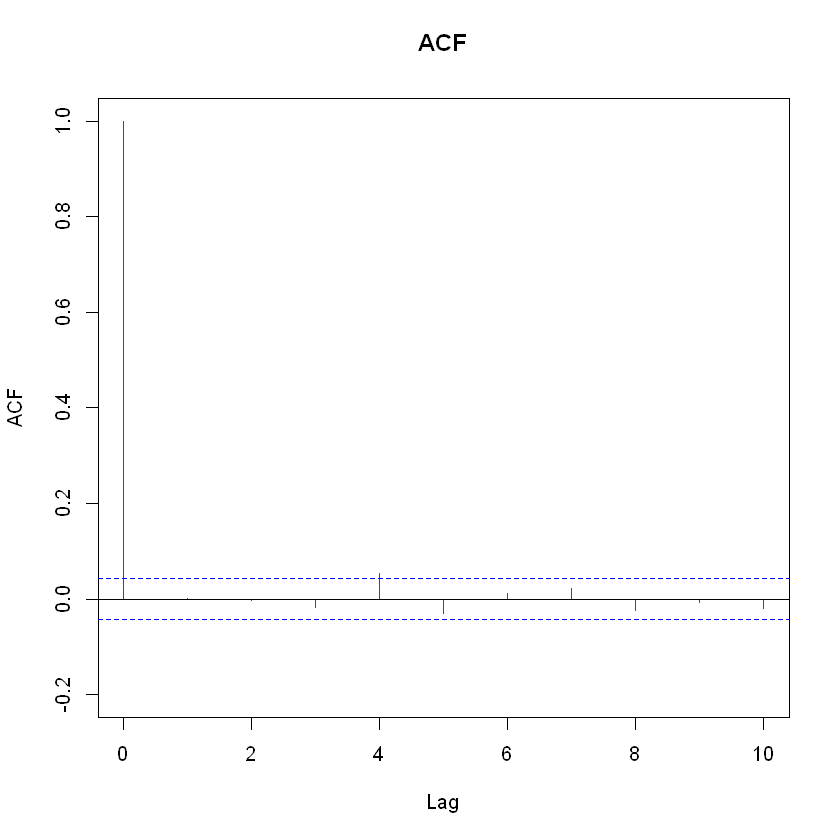

In [29]:
acf(exchange_data,10,main="ACF",col="red",ylim=c(-0.2,1))

In [30]:
Box.test(exchange_data,lag=10,type="Ljung")


	Box-Ljung test

data:  exchange_data
X-squared = 11.921, df = 10, p-value = 0.2904


Using the $\alpha=0.05$ significance level, the $p=0.29 > \alpha=0.05$, then not reject the null hypothesis. 

Thus, claim that there isn't any serial correlation in the percentage log return of Exchange data.

### b. Is there any ARCH effect in the log return series?

In [31]:
exchange_at = exchange_data-mean(exchange_data)

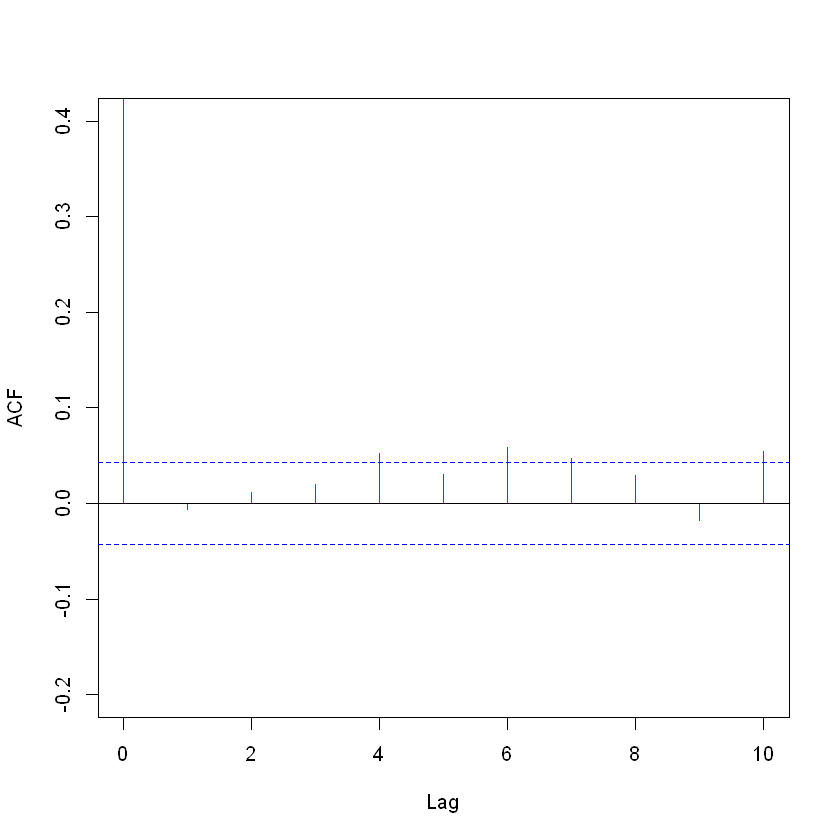

In [32]:
acf(exchange_at^2,10,main="",col="red",ylim=c(-0.2,0.4))

In [33]:
Box.test(exchange_at^2,lag=10,type="Ljung")


	Box-Ljung test

data:  exchange_at^2
X-squared = 29.121, df = 10, p-value = 0.001191


Using the $\alpha=0.05$ significance level, the $p=0.0012 < \alpha$, then reject the null hypothesis. 

Thus, claim that there is ARCH correlation in the log return of Exchange data.

### c. Fit an IGARCH(1,1) model to the log return series using normal
innovations. Perform model checking and write down the fitted model.

In [34]:
exchange_spec=ugarchspec(variance.model=list(model="iGARCH", garchOrder=c(1,1)),
                 mean.model=list(armaOrder=c(0,0)) )
exchange_igarch=ugarchfit(spec=exchange_spec,data=exchange_data)
exchange_igarch


*---------------------------------*
*          GARCH Model Fit        *
*---------------------------------*

Conditional Variance Dynamics 	
-----------------------------------
GARCH Model	: iGARCH(1,1)
Mean Model	: ARFIMA(0,0,0)
Distribution	: norm 

Optimal Parameters
------------------------------------
        Estimate  Std. Error  t value Pr(>|t|)
mu      0.011123    0.012801 0.868957 0.384871
omega   0.000004    0.000108 0.034425 0.972538
alpha1  0.016037    0.003822 4.196091 0.000027
beta1   0.983963          NA       NA       NA

Robust Standard Errors:
        Estimate  Std. Error  t value Pr(>|t|)
mu      0.011123    0.013113 0.848273 0.396286
omega   0.000004    0.000070 0.052819 0.957876
alpha1  0.016037    0.004609 3.479640 0.000502
beta1   0.983963          NA       NA       NA

LogLikelihood : -1867.463 

Information Criteria
------------------------------------
                   
Akaike       1.8125
Bayes        1.8207
Shibata      1.8125
Hannan-Quinn 1.8155

Weighted

In [35]:
stresi=residuals(exchange_igarch,standardize=T)
Box.test(stresi,lag=10,type="Ljung",fitdf=2)


	Box-Ljung test

data:  stresi
X-squared = 9.6109, df = 8, p-value = 0.2934


Using the $\alpha=0.05$ significance level, the $p=0.29 > \alpha$, then not reject the null hypothesis that the standardized residuals $\epsilon_t$ are uncorrelated. 

Thus, the model satisfies the assumption the standardized residuals $\epsilon_t$ are uncorrelated and obeys a normal distribution. And we claim that the model pass the model checking.

### d. Use the model to produce 1-step to 4-step ahead forecasts for the log return series and its 1-step forecasting interval.

In [36]:
exchange_forecast = ugarchforecast(exchange_igarch,n.ahead=4)
exchange_forecast

Warning message in `setfixed<-`(`*tmp*`, value = as.list(pars)):
"Unrecognized Parameter in Fixed Values: beta1...Ignored"



*------------------------------------*
*       GARCH Model Forecast         *
*------------------------------------*
Model: iGARCH
Horizon: 4
Roll Steps: 0
Out of Sample: 0

0-roll forecast [T0=1975-08-27 09:00:00]:
     Series  Sigma
T+1 0.01112 0.3746
T+2 0.01112 0.3746
T+3 0.01112 0.3746
T+4 0.01112 0.3746

